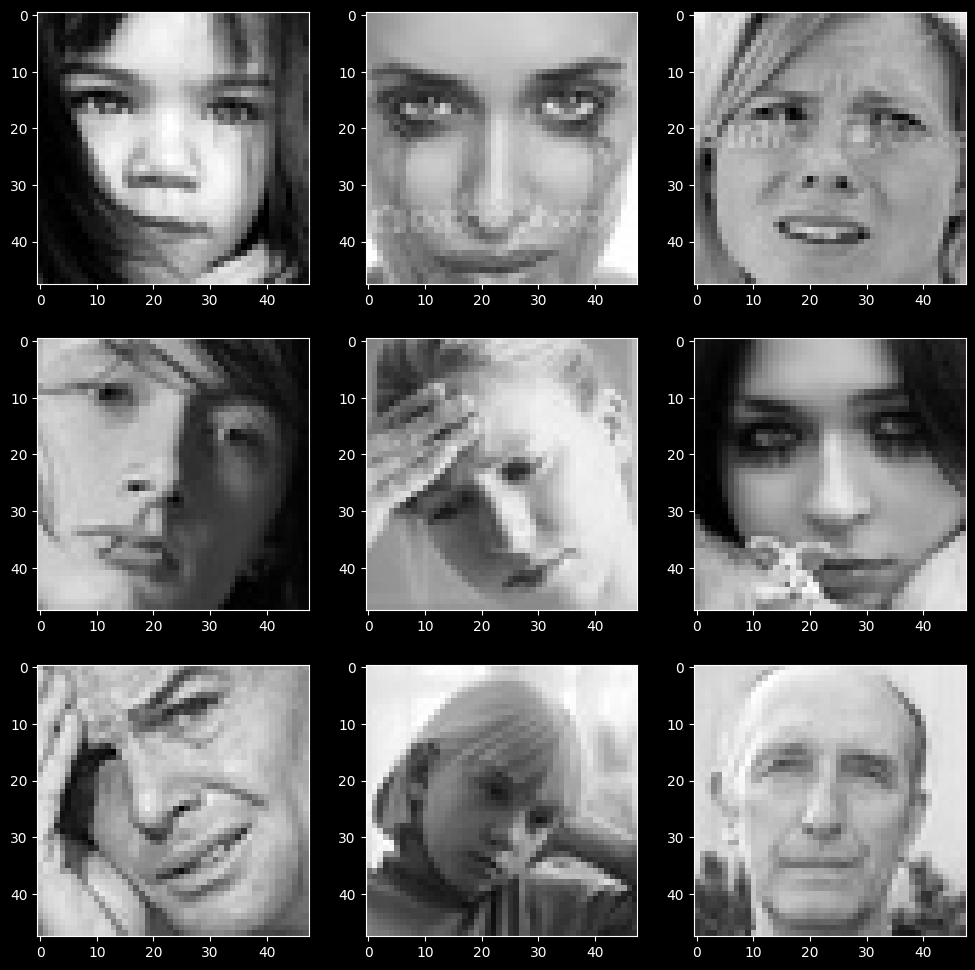

In [17]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array
import os
picture_size = 48
folder_path = r"C:\2 manasa\MENTAL_DISORDER DISORDER\DATASETS"
expression = 'stress'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"/train/"+expression+"/"+
                  os.listdir(folder_path + "/train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

In [23]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Parameters
batch_size = 128
picture_size = 48
folder_path = r"C:\2 manasa\MENTAL_DISORDER DISORDER\DATASETS"  # Change if needed

# Paths joined correctly using os.path.join
train_path = os.path.join(folder_path, "train")
test_path = os.path.join(folder_path, "test")

# Data generator with augmentation for training
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data generator for validation/testing (no augmentation)
datagen_val = ImageDataGenerator(rescale=1./255)

# Create train data loader with augmentation
train_set = datagen_train.flow_from_directory(
    train_path,
    target_size=(picture_size, picture_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Create test data loader without augmentation
test_set = datagen_val.flow_from_directory(
    test_path,
    target_size=(picture_size, picture_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 5000 images belonging to 5 classes.
Found 5000 images belonging to 5 classes.


In [19]:
from keras.optimizers import Adam,SGD,RMSprop
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 5

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(5, activation='softmax'))

model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())


c:\Users\punit\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 44, 44, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,488,069 (9.49 MB)

 Trainable params: 2,488,069 (9.49 MB)

 Non-trainable params: 0 (0.00 B)

None


In [20]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.keras", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.0001),

              metrics=['accuracy'])
history = model.fit(
    train_set,
    epochs=epochs,
    validation_data=test_set,
    callbacks=callbacks_list,
    class_weight=None
)



c:\Users\punit\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/48
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 263ms/step - accuracy: 0.1982 - loss: 4.1188 - val_accuracy: 0.2240 - val_loss: 1.6364 - learning_rate: 1.0000e-04
Epoch 2/48


c:\Users\punit\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\callbacks\model_checkpoint.py:276: UserWarning: Can save best model only with val_acc available.
  if self._should_save_model(epoch, batch, logs, filepath):


40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 252ms/step - accuracy: 0.2206 - loss: 1.7507 - val_accuracy: 0.2644 - val_loss: 1.5927 - learning_rate: 1.0000e-04
Epoch 3/48
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 265ms/step - accuracy: 0.2290 - loss: 1.6537 - val_accuracy: 0.2910 - val_loss: 1.5727 - learning_rate: 1.0000e-04
Epoch 4/48
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 260ms/step - accuracy: 0.2438 - loss: 1.6132 - val_accuracy: 0.3184 - val_loss: 1.5591 - learning_rate: 1.0000e-04
Epoch 5/48
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 268ms/step - accuracy: 0.2676 - loss: 1.5955 - val_accuracy: 0.3232 - val_loss: 1.5475 - learning_rate: 1.0000e-04
Epoch 6/48
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 289ms/step - accuracy: 0.2714 - loss: 1.5799 - val_accuracy: 0.3524 - val_loss: 1.5314 - learning_rate: 1.0000e-04
Epoch 7/48
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 282ms/step - accuracy: 0.2886 - loss: 1.5676 - val_accuracy: 0.3420 - val_loss: 1.5251 - learning_rate: 1.0000e-04
Epoch 8/48
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 284ms/step - accuracy: 0.30

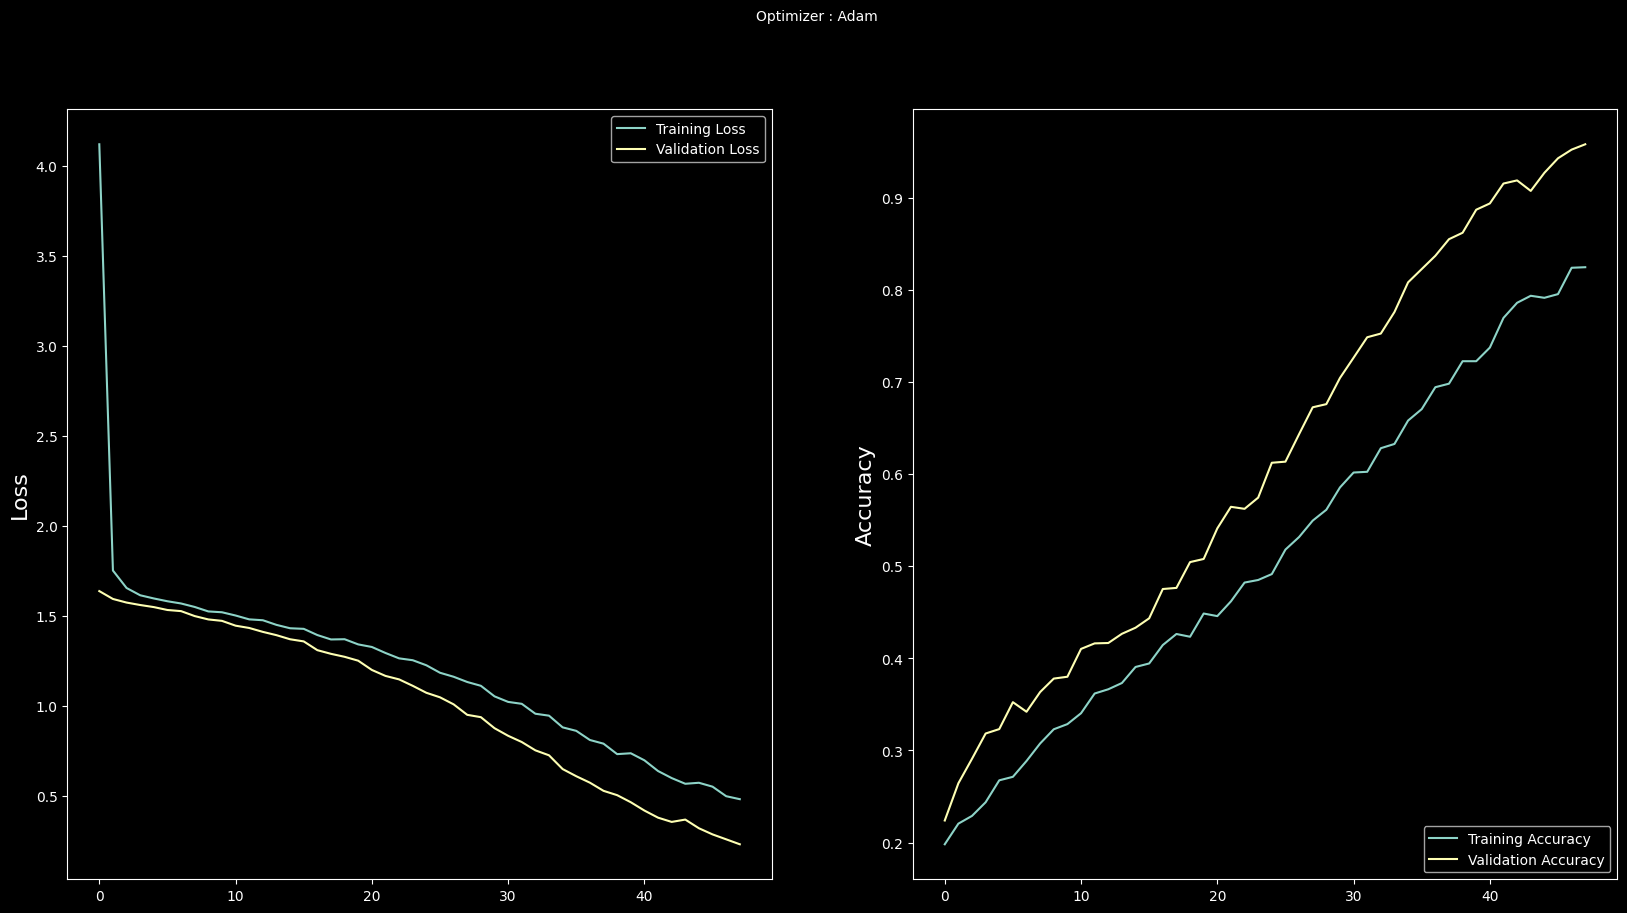

In [24]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [25]:
model.save('model_file.h5')